Author: Dan Shea  
Date: 2019.09.02
Description:  
#### Repeatmasker results analysis on chr04 hotspot locus
The results of running `RepeatMasker` on the consensus sequences extracted for the chr04 recombination hotspot yield a table of motifs identified. However the `.out` file needed to be cleaned up prior to importing it into this notebook as a `pandas.DataFrame`.

* `grep -v '*' chr04_hotspot_locus.fasta.out | egrep -r -E '^\s+[0-9]' - > chr04_hotspot_locus.fasta.tsv` to strip out the multiline header and matchers that are overlapped by a higher scoring match.
* Then in `vi` (using ex) we remove leading and trailing whitespace and convert all remaining whitespace to single tabs to create a tsv file.
* After that, I added a header to define the fields as a single line header.

| bitscore | pct_div | pct_del | pct_ins | query | qstart | qstop | qleft | strand | motif | motif_class | mstart | mstop | mleft | ID |
|----------|---------|---------|---------|-------|--------|-------|-------|--------|-------|-------------|--------|-------|-------|----|

**Note** There was a typo in the fasta header when I extracted the sequences. The extracted range is `19,370,000:19,400,000`.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import plotly.express as px
from statsmodels.stats.multitest import fdrcorrection

/home/dshea/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [6]:
infile = 'chr04_hotspot_locus.fasta.tsv'

In [7]:
repeatmasker = pd.read_csv(infile, sep='\t', index_col=False)

In [8]:
repeatmasker[0:10]

,bitscore,pct_div,pct_del,pct_ins,query,qstart,qstop,qleft,strand,motif,motif_class,mstart,mstop,mleft,ID
0,21,22.2,0.0,1.9,BADARI_DHAN:chr04:19370000:19400000,1250,1303,(28697),+,(CGG)n,Simple_repeat,1,53,(0),1
1,13,0.0,7.7,3.7,BADARI_DHAN:chr04:19370000:19400000,1550,1575,(28425),+,(CGA)n,Simple_repeat,1,27,(0),3
2,19,17.2,6.5,0.0,BADARI_DHAN:chr04:19370000:19400000,1980,2025,(27975),+,(TC)n,Simple_repeat,1,49,(0),4
3,12,13.9,4.4,6.8,BADARI_DHAN:chr04:19370000:19400000,2719,2763,(27237),+,GA-rich,Low_complexity,1,44,(0),5
4,16,11.3,4.8,4.8,BADARI_DHAN:chr04:19370000:19400000,3705,3746,(26254),+,(GCC)n,Simple_repeat,1,42,(0),6
5,29,23.8,0.0,0.0,BADARI_DHAN:chr04:19370000:19400000,3853,3921,(26079),+,(GCG)n,Simple_repeat,1,69,(0),7
6,12,17.4,0.0,5.9,BADARI_DHAN:chr04:19370000:19400000,4072,4107,(25893),+,(AATT)n,Simple_repeat,1,34,(0),8
7,14,0.0,0.0,0.0,BADARI_DHAN:chr04:19370000:19400000,6476,6493,(23507),+,(GAC)n,Simple_repeat,1,18,(0),9
8,16,28.4,1.8,0.0,BADARI_DHAN:chr04:19370000:19400000,6611,6669,(23331),+,(CGC)n,Simple_repeat,1,60,(0),10
9,18,24.4,1.3,6.8,BADARI_DHAN:chr04:19370000:19400000,8442,8518,(21482),+,(CCG)n,Simple_repeat,1,73,(0),11


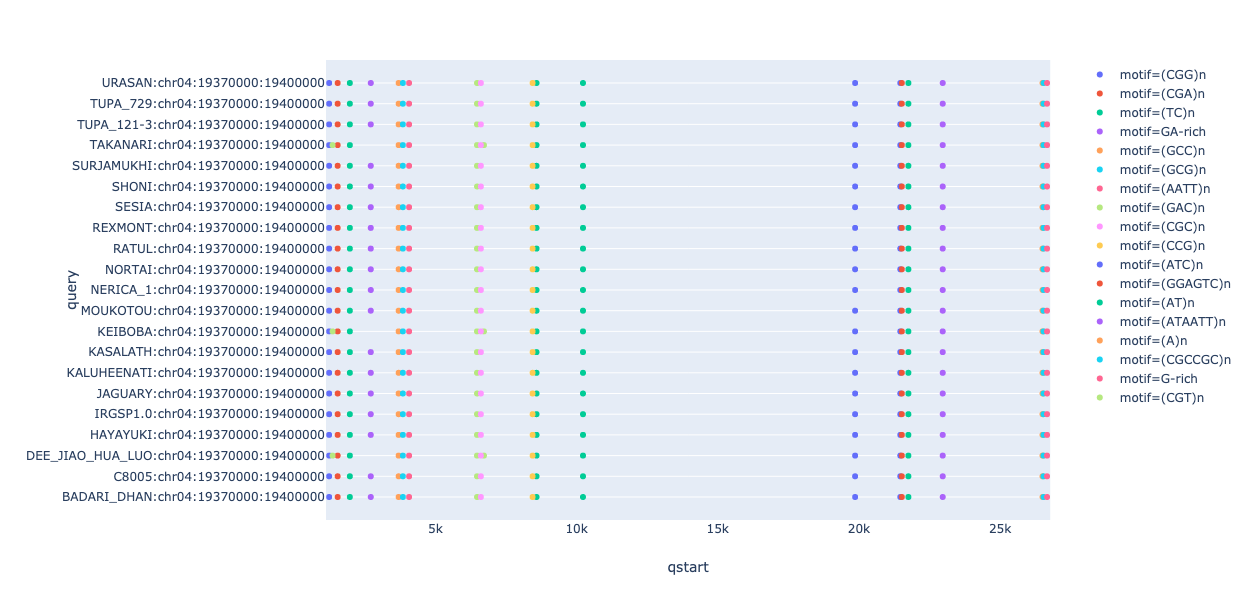

In [9]:
px.strip(repeatmasker, x='qstart', y='query', color='motif')